# ALE Meta-Analysis of Perspective Taking Using NiMARE

**Code author:** Maria Brucato | [Email](mailto:mbrucato@temple.edu) | [Twitter](https://twitter.com/mariagbrucato) | [GitHub](https://github.com/mbrucato)

**Goal:** The following code will conudct a coordinate-based activation liklihood estimation (ALE) meta-analysis of neuroimaging studies of cognitive, affective, and spatial perspective taking (PT) and attention switching in NiMARE (Salo et al., 2021). Then, it will compute conjunctions between the images using nilearn (Abraham et al., 2014).

**References**
1. Abraham, A., Pedregosa, F., Eickenberg, M., Gervais, P., Mueller, A., Kossaifi, J., Gramfort, A., Thirion, B., & Varoquaux, G. (2014). Machine learning for neuroimaging with scikit-learn. Frontiers in Neuroinformatics (Vol. 8). Frontiers Media SA [[1]](https://neurolibre.org/papers/10.55458/neurolibre.00007)

2. Salo, T., Yarkoni, T., Nichols, T., Poline, J.-B., Bilgel, M., Bottenhorn, K., Jarecka, D., Kent, J., Kimbler, A., Nielson, D., Oudyk, K., Peraza, J., Pérez, A., Reeders, P., Yanes, J., & Laird, A. (2022). NiMARE: Neuroimaging Meta-Analysis Research Environment. In NeuroLibre Reproducible Preprint Server (Vol. 1, Issue 1, p. 7). Centre de Recherche de l’Institut Universitaire de Geriatrie de Montreal.[[2]](https://www.frontiersin.org/articles/10.3389/fninf.2014.00014/full)[[3]](https://nimare.readthedocs.io/en/latest/index.html)


**Overview of Code**:<br>
1. Import modules, set parameters, and import data<br>
2. Run individual ALE meta-analyses using NiMARE<br>
3. Create cluster tables <br>
4. Compute conjunctions using nilearn<br>


## Step 1: Setting Up & Imporing Data
For the present analysis, the following packages were used:<br>
nimare ([V.0.0.12rc1](https://github.com/neurostuff/NiMARE/tree/0.0.12rc1/nimare))<br>
nilearn ([v.0.0.1](https://github.com/nilearn/nilearn/tree/0.9.1))<br>

In [18]:
#Import necessary modules from packages
import os
import matplotlib.pyplot as plt
import nilearn
from nilearn.image import math_img
from nilearn.plotting import plot_stat_map
from nilearn.reporting import get_clusters_table
from nimare import io, utils
from nimare.correct import FDRCorrector, FWECorrector
from nimare.dataset import Dataset
from nimare.meta import ALE

#Set paths for input and output folders
inData = "Input_Data/"
outData = "Output/"

#Import data from sleuth text files
spatial_dset = io.convert_sleuth_to_dataset(os.path.join(inData+'Spatial_PT_all.txt'))
spatial2_dset = io.convert_sleuth_to_dataset(os.path.join(inData+"Spatial_PT_lvl2.txt"))
cognitive_dset = io.convert_sleuth_to_dataset(os.path.join(inData+"Cognitive_PT.txt"))
affective_dset = io.convert_sleuth_to_dataset(os.path.join(inData+"Affective_PT.txt"))
attention_dset = io.convert_sleuth_to_dataset(os.path.join(inData+"Attention.txt"))

print('finished')

finished


## Step 2: Run ALE Meta-Analysis for Individual Domains

In [5]:
#Set parameters for ALE
ale = ALE(null_method="approximate")

#Perform individual domain ALEs
spatial_results = ale.fit(spatial_dset)
spatial2_results = ale.fit(spatial2_dset)
cognitive_results = ale.fit(cognitive_dset)
affective_results = ale.fit(affective_dset)
attention_results = ale.fit(attention_dset)
print("finished")

finished


***Important Note:*** for this online version of the code, the FWE corrector is only running 100 iterations to make the run time fast. In the actual analysis, 10,000 iterations were used and the analysis was run on [Temple University's Compute Server](https://www.hpc.temple.edu/compute/). See the .py file in the home directory for the version of the scrip which has 10,000 iterations. Output from the 10,000 iteration analysis can be found in the *Output/005_10000_iterations* directory.

In [6]:
#Set parameters for FWE correction
corr = FWECorrector(method='montecarlo', voxel_thresh=0.005, n_iters=100, n_cores=7)

#Correct ALE for multiple comparisons
spatial_corrected_results = corr.transform(spatial_results)
spatial2_corrected_results = corr.transform(spatial2_results)
cognitive_corrected_results = corr.transform(cognitive_results)
affective_corrected_results = corr.transform(affective_results)
attention_corrected_results = corr.transform(attention_results)

INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/100 [00:00<?, ?it/s]

INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/100 [00:00<?, ?it/s]

INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/100 [00:00<?, ?it/s]

INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/100 [00:00<?, ?it/s]

INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.
INFO:nimare.correct:Using correction method implemented in Estimator: nimare.meta.cbma.ale.ALE.correct_fwe_montecarlo.


  0%|          | 0/100 [00:00<?, ?it/s]

INFO:nimare.meta.cbma.base:Using null distribution for voxel-level FWE correction.


In [29]:
#Save the resulting maps to output folder
spatial_corrected_results.save_maps(prefix="all_spatial_005", prefix_sep="_", output_dir= os.path.join(outData+'005_100_iterations/all_Spatial'))
spatial2_corrected_results.save_maps(prefix="lvl2_spatial_005", prefix_sep="_", output_dir= os.path.join(outData+'005_100_iterations/lvl2_Spatial'))
cognitive_corrected_results.save_maps(prefix="all_cognitive_005", prefix_sep="_", output_dir= os.path.join(outData+'005_100_iterations/all_Cognitive'))
affective_corrected_results.save_maps(prefix="all_affective_005", prefix_sep="_", output_dir= os.path.join(outData+'005_100_iterations/all_Affective'))
attention_corrected_results.save_maps(prefix="all_attention_005", prefix_sep="_", output_dir= os.path.join(outData+'005_100_iterations/all_Attention'))

print("finished")

Let's view our ALE maps from each domain. Here I will graph the maps resulting from the 10,000-iteration FWE correction.

C:\Users\maria\AppData\Local\Temp\ipykernel_20416\3591548134.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\maria\AppData\Local\Temp\ipykernel_20416\3591548134.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\maria\AppData\Local\Temp\ipykernel_20416\3591548134.py:59: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\maria\AppData\Local\Temp\ipykernel_20416\3591548134.py:72: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


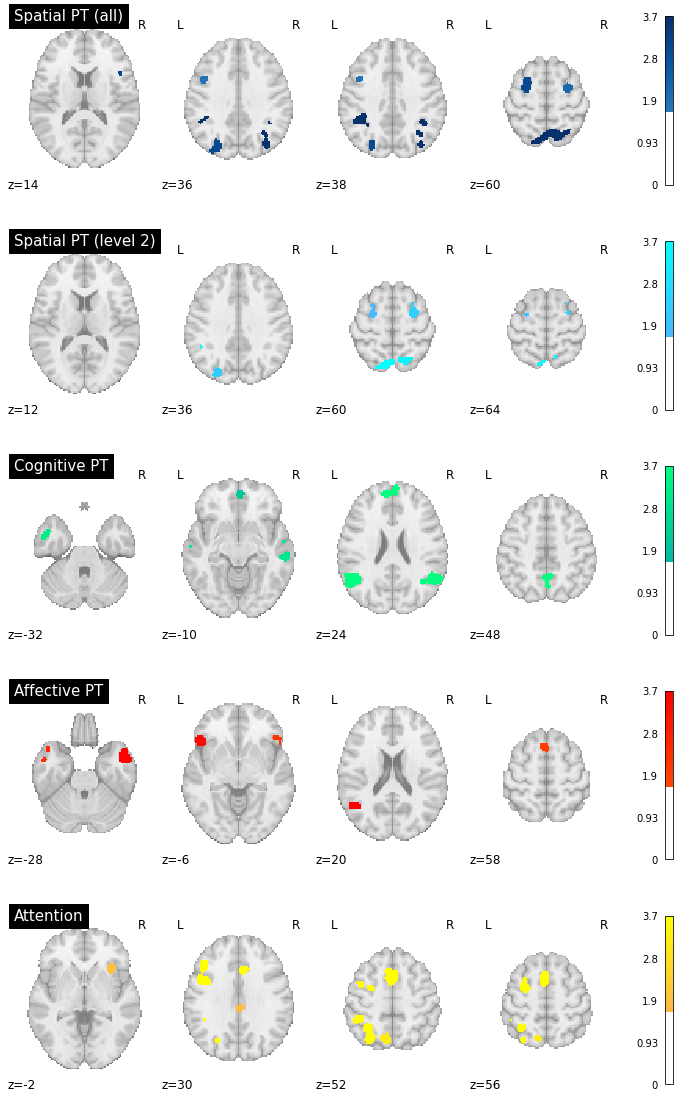

In [8]:
#Create the plot space
fig, axes = plt.subplots(figsize=(12, 20), nrows=5)

spatial_img = os.path.join(outData+'005_10000_iterations/all_Spatial', "all_spatial_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz")
spatial2_img = os.path.join(outData+'005_10000_iterations/lvl2_Spatial', "lvl2_spatial_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz")
cognitive_img = os.path.join(outData+'005_10000_iterations/all_Cognitive', "all_cognitive_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz")
affective_img = os.path.join(outData+'005_10000_iterations/all_Affective', "all_affective_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz")
attention_img = os.path.join(outData+'005_10000_iterations/all_Attention', "all_attention_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz")

#Spatial PT (all) plot
plot_stat_map(
    spatial_img,
    cut_coords=4,
    display_mode="z",
    title="Spatial PT (all)",
    threshold=1.645,  # cluster-level p < .05, one-tailed
    cmap="Blues",
    axes=axes[0],
    figure=fig,
)

#Spatial PT (level 2) plot
plot_stat_map(
    spatial2_img ,
    cut_coords=4,
    display_mode="z",
    title="Spatial PT (level 2)",
    threshold=1.645,  # cluster-level p < .05, one-tailed
    cmap="cool_r",
    axes=axes[1],
    figure=fig,
)
fig.show()

#Cognitive PT plot
plot_stat_map(
    cognitive_img ,
    cut_coords=4,
    display_mode="z",
    title="Cognitive PT",
    threshold=1.645,  # cluster-level p < .05, one-tailed
    cmap="winter",
    axes=axes[2],
    figure=fig,
)
fig.show()

#Affective PT plot
plot_stat_map(
    affective_img ,
    cut_coords=4,
    display_mode="z",
    title="Affective PT",
    threshold=1.645,  # cluster-level p < .05, one-tailed
    cmap="autumn_r",
    axes=axes[3],
    figure=fig,
)
fig.show()

#Attention switching plot
plot_stat_map(
    attention_img ,
    cut_coords=4,
    display_mode="z",
    title="Attention",
    threshold=1.645,  # cluster-level p < .05, one-tailed
    cmap="spring",
    axes=axes[4],
    figure=fig,
)
fig.show()



Now we will generate cluster tables and run focus-count analyses. Focus-count analyses describe the relative contribution of each neuroimaging study to the significant meta-analytically derived clusters.

In [60]:
#Generate cluster tables
clust_all_Spatial = nilearn.reporting.get_clusters_table(outData+"005_10000_iterations/"+"all_spatial_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz", 1.645)
clust_lv2_Spatial = nilearn.reporting.get_clusters_table(outData+"005_10000_iterations/"+"lvl2_spatial_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz", 1.645)
clust_all_Cognitive = nilearn.reporting.get_clusters_table(outData+"005_10000_iterations/"+"all_cognitive_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz", 1.645)
clust_all_Affective = nilearn.reporting.get_clusters_table(outData+"005_10000_iterations/"+"all_affective_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz", 1.645)
clust_all_Attention = nilearn.reporting.get_clusters_table(outData+"005_10000_iterations/"+"all_attention_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz", 1.645)

#Write cluster tables to .csv
clust_all_Spatial.to_csv(path_or_buf= os.path.join(outData+"005_10000_iterations/"+"cluster_table_all_Spatial.csv"), sep=',')
clust_lv2_Spatial.to_csv(path_or_buf= os.path.join(outData+"005_10000_iterations/"+"cluster_table_lv2_Spatial.csv"), sep=',')
clust_all_Cognitive.to_csv(path_or_buf= os.path.join(outData+"005_10000_iterations/"+"cluster_table_all_Cognitive.csv"), sep=',')
clust_all_Affective.to_csv(path_or_buf= os.path.join(outData+"005_10000_iterations/"+"cluster_table_all_Affective.csv"), sep=',')
clust_all_Attention.to_csv(path_or_buf= os.path.join(outData+"005_10000_iterations/"+"cluster_table_all_Attention.csv"), sep=',') 



C:\Users\maria\anaconda3\lib\site-packages\nilearn\reporting\_get_clusters_table.py:98: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body.
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\nilearn\reporting\_get_clusters_table.py:98: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body.
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\nilearn\reporting\_get_clusters_table.py:98: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body.
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\nilearn\reporting\_get_clusters_table.py:98: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body.
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\nilearn\reporting\_get_clusters_table.py:98: UserWarning: Attention: At least one of the (sub)peaks falls outside of the cluster body.
  warnings.warn(


## Step 3: Conjunctions

Finally, we can calculate the conjunction between individual domains. This tells us whether there are brain regions with overlapping meta-analytically derived functional activity between spatial, cognitive, and affective PT and attention orienting.

In [32]:
#Initialize formula for conjunction function
formula = "np.where(img * img2 > 0, np.minimum(img, img2), 0)"

#Conjunctions: spatial PT, cognitive PT, affective PT
conj_allSpatial_x_Cognitive = math_img(formula, img=os.path.join(outData+"005_10000_iterations/all_Spatial/all_spatial_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"), img2=os.path.join(outData+"005_10000_iterations/all_Cognitive/all_cognitive_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"))
conj_allSpatial_x_Affective = math_img(formula, img=os.path.join(outData+"005_10000_iterations/all_Spatial/all_spatial_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"), img2=os.path.join(outData+"005_10000_iterations/all_Affective/all_affective_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"))
conj_lvl2Spatial_x_Cognitive = math_img(formula, img=os.path.join(outData+"005_10000_iterations/lvl2_Spatial/lvl2_spatial_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"), img2=os.path.join(outData+"005_10000_iterations/all_Cognitive/all_cognitive_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"))
conj_lvl2Spatial_x_Affective = math_img(formula, img=os.path.join(outData+"005_10000_iterations/lvl2_Spatial/lvl2_spatial_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"), img2=os.path.join(outData+"005_10000_iterations/all_Affective/all_affective_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"))
conj_Cognitive_x_Affective = math_img(formula, img=os.path.join(outData+"005_10000_iterations/all_Cognitive/all_cognitive_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"), img2=os.path.join(outData+"005_10000_iterations/all_Affective/all_affective_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"))

#Conjunctions: attention x PT
conj_Attention_x_allSpatial = math_img(formula, img=os.path.join(outData+"005_10000_iterations/all_Attention/all_attention_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"), img2=os.path.join(outData+"005_10000_iterations/all_Spatial/all_spatial_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"))
conj_Attention_x_lvl2Spatial = math_img(formula, img=os.path.join(outData+"005_10000_iterations/all_Attention/all_attention_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"), img2= os.path.join(outData+"005_10000_iterations/lvl2_Spatial/lvl2_spatial_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"))
conj_Attention_x_Cognitive = math_img(formula, img=os.path.join(outData+"005_10000_iterations/all_Attention/all_attention_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"), img2=os.path.join(outData+"005_10000_iterations/all_Cognitive/all_cognitive_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"))
conj_Attention_x_Affective = math_img(formula, img=os.path.join(outData+"005_10000_iterations/all_Attention/all_attention_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"), img2=os.path.join(outData+"005_10000_iterations/all_Affective/all_affective_005_z_desc-size_level-cluster_corr-FWE_method-montecarlo.nii.gz"))

print("finished")

finished


In [36]:
#Save the resulting maps to output folder
conj_allSpatial_x_Cognitive.to_filename(outData+'005_10000_iterations/Conjunctions/conj_allSpatial_x_Cognitive.nii.gz')
conj_allSpatial_x_Affective.to_filename(outData+'005_10000_iterations/Conjunctions/conj_allSpatial_x_Affective.nii.gz')
conj_lvl2Spatial_x_Cognitive.to_filename(outData+'005_10000_iterations/Conjunctions/conj_lvl2Spatial_x_Cognitive.nii.gz')
conj_lvl2Spatial_x_Affective.to_filename(outData+'005_10000_iterations/Conjunctions/conj_lvl2Spatial_x_Affective.nii.gz')
conj_Cognitive_x_Affective.to_filename(outData+'005_10000_iterations/Conjunctions/conj_Cognitive_x_Affective.nii.gz')

conj_Attention_x_allSpatial.to_filename(outData+'005_10000_iterations/Conjunctions/conj_Attention_x_allSpatial.nii.gz')
conj_Attention_x_lvl2Spatial.to_filename(outData+'005_10000_iterations/Conjunctions/conj_Attention_x_lvl2Spatial.nii.gz')
conj_Attention_x_Cognitive.to_filename(outData+'005_10000_iterations/Conjunctions/conj_Attention_x_Cognitive.nii.gz')
conj_Attention_x_Affective.to_filename(outData+'005_10000_iterations/Conjunctions/conj_Attention_x_Affective.nii.gz')

print("finished")

finished


Here are the resulting images for a selection of the conjunctions we just ran:

C:\Users\maria\AppData\Local\Temp\ipykernel_20416\4201681214.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\maria\AppData\Local\Temp\ipykernel_20416\4201681214.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\maria\AppData\Local\Temp\ipykernel_20416\4201681214.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\maria\AppData\Local\Temp\ipykernel_20416\4201681214.py:65: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\maria\AppData\Local\Temp\ipykernel_20416\4201681214.py:79: UserWarning: Matplotlib is currently using m

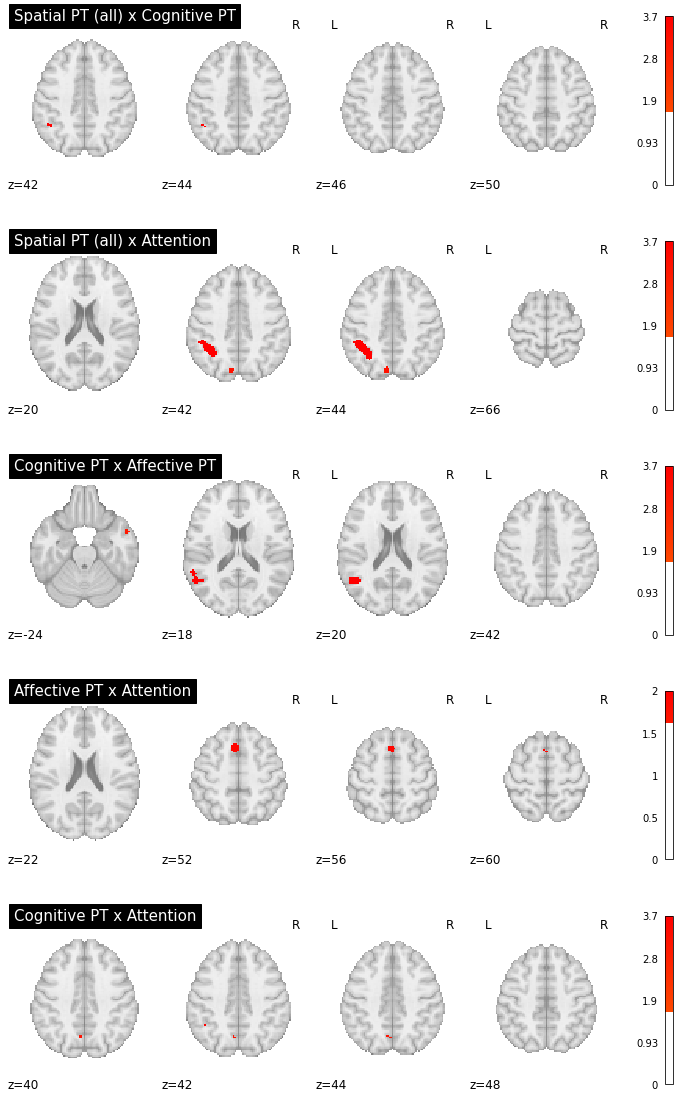

In [45]:
#Create the plot space
fig, axes = plt.subplots(figsize=(12, 20), nrows=5)

conj_allSpatial_x_Cognitive_img = os.path.join(outData+'005_10000_iterations/Conjunctions/conj_allSpatial_x_Cognitive.nii.gz')
conj_Attention_x_allSpatial_img = os.path.join(outData+'005_10000_iterations/Conjunctions/conj_Attention_x_allSpatial.nii.gz')
conj_Cognitive_x_Affective_img = os.path.join(outData+'005_10000_iterations/Conjunctions/conj_Cognitive_x_Affective.nii.gz')
conj_Attention_x_Affective_img = os.path.join(outData+'005_10000_iterations/Conjunctions/conj_Attention_x_Affective.nii.gz')
conj_Attention_x_Cognitive_img = os.path.join(outData+'005_10000_iterations/Conjunctions/conj_Attention_x_Cognitive.nii.gz')


#Spatial PT (all) x Cognitive PT plot
plot_stat_map(
    conj_allSpatial_x_Cognitive_img,
    cut_coords=4,
    display_mode="z",
    title="Spatial PT (all) x Cognitive PT",
    threshold=1.645,  # cluster-level p < .05, one-tailed
    cmap="autumn_r",
    axes=axes[0],
    figure=fig,
)

fig.show()

#Spatial PT (all) x Attention plot
plot_stat_map(
    conj_Attention_x_allSpatial_img,
    cut_coords=4,
    display_mode="z",
    title="Spatial PT (all) x Attention",
    threshold=1.645,  # cluster-level p < .05, one-tailed
    cmap="autumn_r",
    axes=axes[1],
    figure=fig,
)

fig.show()

#Cognitive PT x Affective PT plot
plot_stat_map(
    conj_Cognitive_x_Affective_img,
    cut_coords=4,
    display_mode="z",
    title="Cognitive PT x Affective PT",
    threshold=1.645,  # cluster-level p < .05, one-tailed
    cmap="autumn_r",
    axes=axes[2],
    figure=fig,
)

fig.show()

#Cogntive PT x Attention plot
plot_stat_map(
    conj_Attention_x_Affective_img,
    cut_coords=4,
    display_mode="z",
    title="Affective PT x Attention",
    threshold=1.645,  # cluster-level p < .05, one-tailed
    cmap="autumn_r",
    axes=axes[3],
    figure=fig,
)

fig.show()

#Affective PT x Attention plot
plot_stat_map(
    conj_Attention_x_Cognitive_img,
    cut_coords=4,
    display_mode="z",
    title="Cognitive PT x Attention",
    threshold=1.645,  # cluster-level p < .05, one-tailed
    cmap="autumn_r",
    axes=axes[4],
    figure=fig,
)

fig.show()